# MenpoFit Widgets

The aim of this notebook is to demonstrate the high level widget functions that visualise all the `MenpoFit` objects. It is split in the following sections:

1. [__Basics__](#sec:basics)
2. [__Train Models__](#sec:train)
3. [__Holistic AAM and ATM Widgets__](#sec:holistic)
4. [__Patch-based AAM and ATM Widgets__](#sec:patch_based)
5. [__CLM Widgets__](#sec:clm)
6. [__Fitting Result__](#sec:result)
7. [__Cumulative Error Distributuon__](#sec:ced)

## <a name="sec:basics"></a>1. Basics

Let's first import all the widgets:

In [1]:
from menpowidgets import (visualize_shape_model, visualize_appearance_model, visualize_aam, 
                          visualize_atm, visualize_patch_appearance_model, visualize_patch_aam, 
                          visualize_patch_atm, visualize_expert_ensemble, visualize_clm, 
                          visualize_fitting_result, plot_ced, visualize_images)

They are all functions which have some common arguments:

* __style__: It can be either ``'coloured'`` or ``'minimal'``. The ``'coloured'`` style uses a colouring theme that is different for each widget. The ``'minimal'`` style is very simple with black and white colours.
* __figure_size__: This argument is a `tuple` that defines the size of the rendered figure in inches. The figure size can also be controlled from the _Renderer_ options within the widgets.
* __browser_style__: It can be either ``'buttons'`` or ``'slider'``. This argument exists in widgets that visualize a list of objects (e.g. shape models or fitting results). If ``'buttons'``, then the object selection will be done by the <i class="fa fa-plus"></i> / <i class="fa fa-minus"></i> buttons. If ``'slider'``, then the object selection is done using a slider widget.

Note that all widgets can get as input a `list` of objects with totally different attributes between them. For example, `list` of results with different number of shapes or `list` of `PCAModel` with different number of parameters. Finally, they all have a _Renderer_ tab that has many rendering-related options (such as lines, markers, axes, legend, grid, image) and an _Export_ tab that allows the user to save the figure to file.

## <a name="sec:train"></a>2. Train Models
Before moving on, let's train some models. First let's import what is needed.

In [2]:
%matplotlib inline
import menpo.io as mio
from menpo.feature import igo
from menpo.visualize import print_dynamic

from menpofit.aam import HolisticAAM, PatchAAM, LucasKanadeAAMFitter
from menpofit.atm import HolisticATM, PatchATM
from menpofit.clm import CLM, CorrelationFilterExpertEnsemble
from menpofit.fitter import noisy_shape_from_shape

Now let's load a few some training and fitting images from the [LFPW](http://ibug.doc.ic.ac.uk/resources/facial-point-annotations/) database. Since the aim of this widget is to demonstrate the functionalities of widgets, we don't need to train the most performant models, thus only 60 training images are enough for fast training.

In [3]:
def load_images(path, crop_proportion=None, max_images=None, verbose=True):
    images = []
    for im in mio.import_images(path, max_images=max_images, verbose=verbose):
        # Crop image
        im = im.crop_to_landmarks_proportion(crop_proportion)
        # Congert to greyscale
        if im.n_channels == 3:
            im = im.as_greyscale()
        # Append image object
        images.append(im)
    return images


training_images = load_images('/home/nontas/Dropbox/lfpw/trainset/', 
                              crop_proportion=0.2, max_images=60)
test_images = load_images('/home/nontas/Dropbox/lfpw/testset/', 
                          crop_proportion=0.3, max_images=10)
training_shapes = [im.landmarks['PTS'].lms for im in training_images]

Found 60 assets, index the returned LazyList to import.
Found 10 assets, index the returned LazyList to import.


Let's visualize the training images:

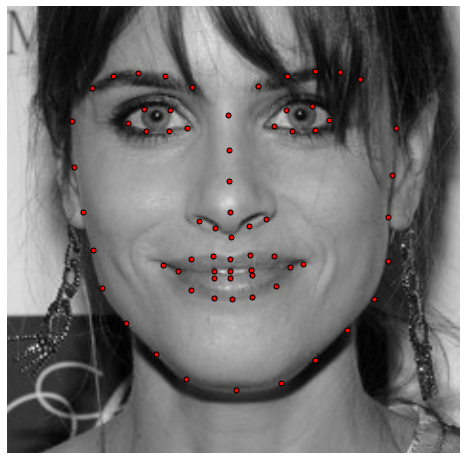

In [4]:
visualize_images(training_images)

Let's train a simple holistic and patch-based AAM:

In [5]:
aam = HolisticAAM(training_images, holistic_features=igo, scales=(0.5, 1.0), diagonal=150, 
                  max_shape_components=20, max_appearance_components=150, verbose=True)

- Computing reference shape                                                     Computing batch 0
- Building models
  - Scale 0: Done
  - Scale 1: Done
                                                              

/home/nontas/Documents/Research/menpofit/menpofit/builder.py:341: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)


In [6]:
patch_aam = PatchAAM(training_images, holistic_features=igo, scales=(0.5, 1.), diagonal=170, 
                     patch_shape=[(15, 15), (21, 21)], max_shape_components=20, 
                     max_appearance_components=150, verbose=True)

- Computing reference shape                                                     Computing batch 0
- Building models
  - Scale 0: Done
  - Scale 1: Done
                                                              

Let's also train a holistic and patch-based ATM using the second image as template:

In [7]:
atm = HolisticATM(training_images[1], training_shapes, holistic_features=igo, scales=(0.5, 1.), 
                  diagonal=150, max_shape_components=20, verbose=True)

- Computing reference shape                                                     Computing batch 0
- Building models
  - Scale 0: Done
  - Scale 1: Done
                                                              

/home/nontas/Documents/Research/menpofit/menpofit/builder.py:341: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)


In [8]:
patch_atm = PatchATM(training_images[1], training_shapes, holistic_features=igo, scales=(0.5, 1.), 
                     diagonal=170, patch_shape=[(15, 15), (21, 21)], max_shape_components=20, 
                     verbose=True)

- Computing reference shape                                                     Computing batch 0
- Building models
  - Scale 0: Done
  - Scale 1: Done
                                                              

Finally, let's train a simple CLM model:

In [9]:
clm = CLM(training_images, diagonal=150, scales=[1.], holistic_features=igo, patch_shape=(19, 19), 
          context_shape=(34, 34), expert_ensemble_cls=CorrelationFilterExpertEnsemble, 
          max_shape_components=20, verbose=True)

- Computing reference shape                                                     Computing batch 0
- Training models
  - Done
                                                                       

## <a name="sec:holistic"></a>3. Holistic AAM and ATM Widgets
The shape models and appearance models of the Holistic AAM can be visualised as: 

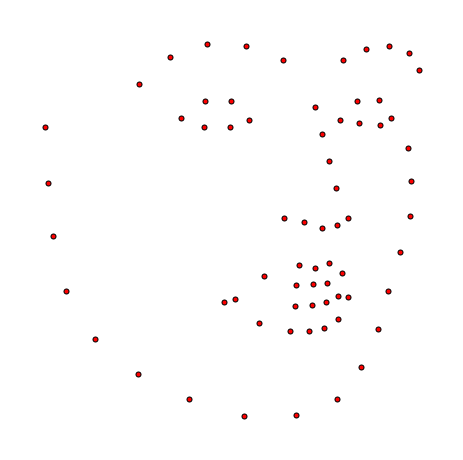

In [10]:
aam.view_shape_models_widget()

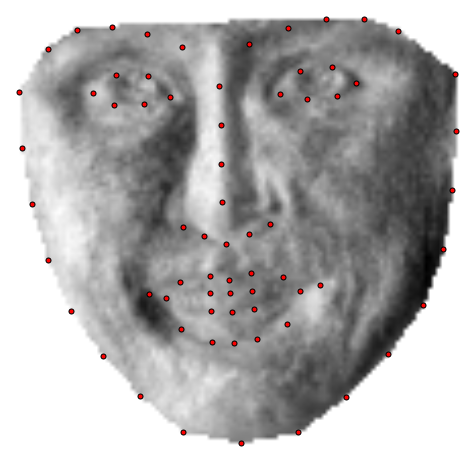

In [11]:
aam.view_appearance_models_widget()

Hit the <i class="fa fa-play"></i> button to view an animation of the variance of each component. The AAM can be viewed as:

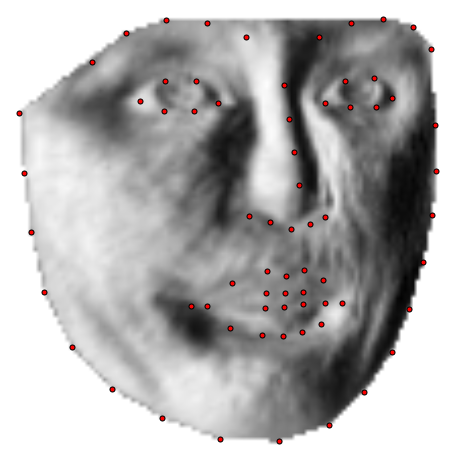

In [12]:
aam.view_aam_widget()

Note that the above class functions are equivalen to:
```python
visualize_shape_model(aam.shape_models)
visualize_appearance_model(aam.appearance_models)
visualize_aam(aam)
```

Now let's also visualize the trained holistic ATM.

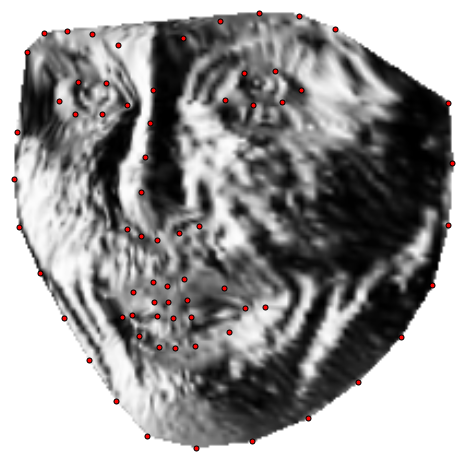

In [13]:
atm.view_atm_widget()

## <a name="sec:patch_based"></a>4. Patch-based AAM and ATM Widgets
Similarly to the holistic case, the patch-based AAM can be visualised as follows:

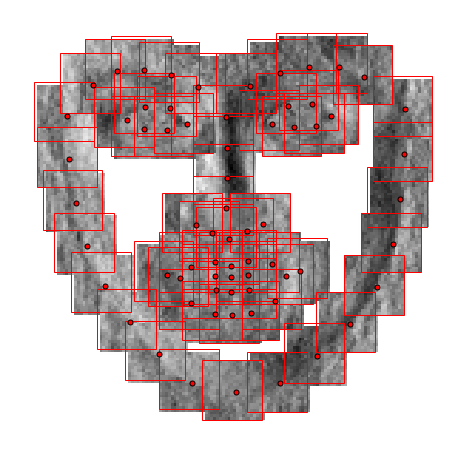

In [14]:
patch_aam.view_appearance_models_widget()

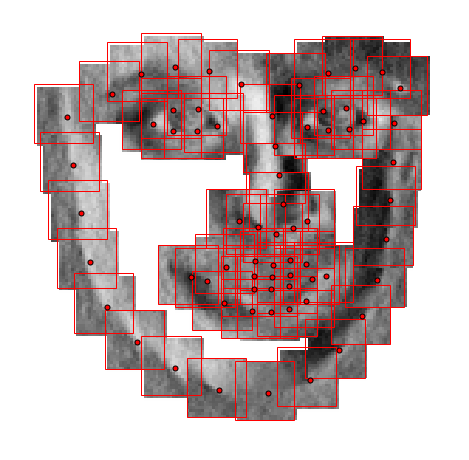

In [15]:
patch_aam.view_aam_widget()

and the patch-based ATM:

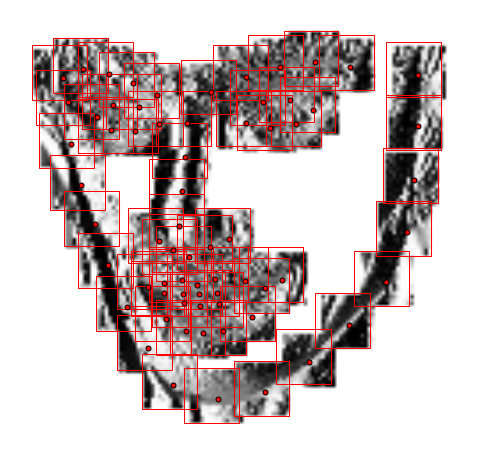

In [16]:
patch_atm.view_atm_widget()

## <a name="sec:clm"></a>5. CLM Widgets

Let's also visualize the CLM widgets:

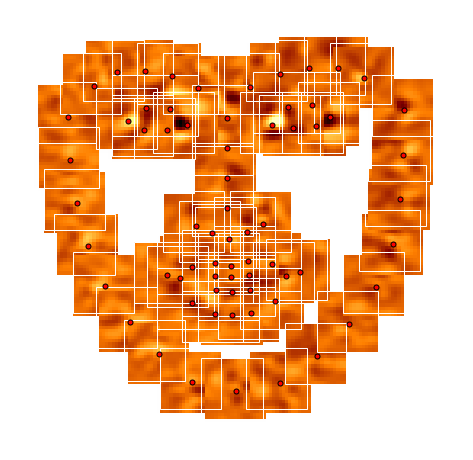

In [17]:
clm.view_expert_ensemble_widget()

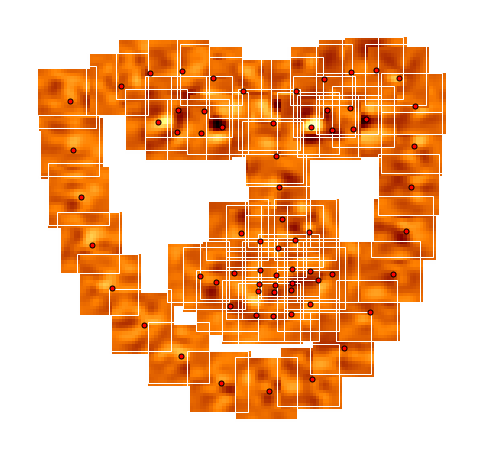

In [18]:
clm.view_clm_widget()

## <a name="sec:result"></a>6. Fitting Result

Let's fit the patch-based AAM on the test images in order to create a list of iterative fitting results.

In [20]:
fitter = LucasKanadeAAMFitter(patch_aam, n_shape=[3, 12], n_appearance=150)
fitting_results = []
for j, im in enumerate(test_images):
    print_dynamic('{}/{}'.format(j + 1, len(test_images)))
    groundtruth_shape = im.landmarks['PTS'].lms
    initial_shape = noisy_shape_from_shape(fitter.reference_shape, groundtruth_shape, 
                                           noise_type='uniform', noise_percentage=0.02, 
                                           allow_alignment_rotation=False)
    fr = fitter.fit_from_shape(im, initial_shape, gt_shape=groundtruth_shape, 
                               max_iters=[10, 15])
    fitting_results.append(fr)

10/10                                                                           

The fitting results can be visualized as:

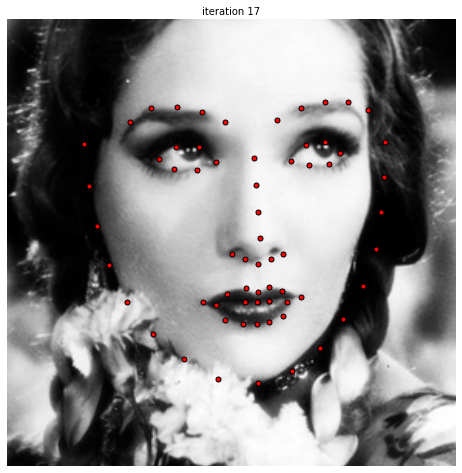

In [21]:
visualize_fitting_result(fitting_results)

Of course, a result has a built-in `view_widget()` function

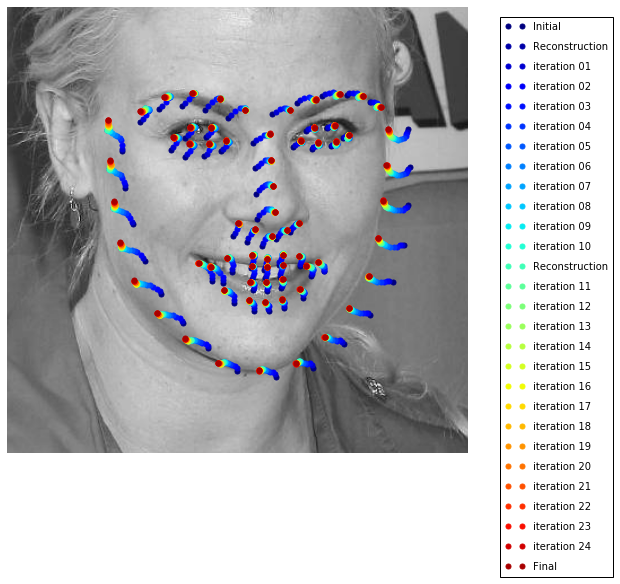

In [22]:
fitting_results[0].view_widget()

Let's now create a list of `Result` objects with different properties and visualize them:

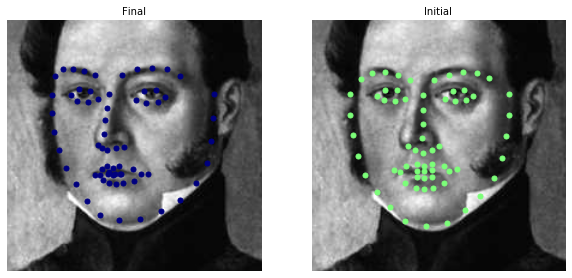

In [23]:
frs = [fitting_results[0]]
frs.append(fitting_results[1].to_result(pass_image=False, pass_initial_shape=False, pass_gt_shape=False))
frs.append(fitting_results[2].to_result(pass_image=True, pass_initial_shape=False, pass_gt_shape=False))
frs.append(fitting_results[3].to_result(pass_image=False, pass_initial_shape=True, pass_gt_shape=False))
frs.append(fitting_results[4].to_result(pass_image=False, pass_initial_shape=False, pass_gt_shape=True))
frs.append(fitting_results[5].to_result(pass_image=True, pass_initial_shape=True, pass_gt_shape=False))
frs.append(fitting_results[6].to_result(pass_image=True, pass_initial_shape=False, pass_gt_shape=True))
frs.append(fitting_results[7].to_result(pass_image=False, pass_initial_shape=True, pass_gt_shape=True))
frs.append(fitting_results[8].to_result(pass_image=True, pass_initial_shape=True, pass_gt_shape=True))
frs.append(fitting_results[9])

visualize_fitting_result(frs)

Note that the widget adapts itself to the properties of each fitting result object.

## <a name="sec:ced"></a>7. Cumulative Error Distributuon

The fitting errors can be nicely visualized with a widget for plotting Cumulative Error Distributions (CED). Let's first create a `list` with the initial and final fitting errors.

In [24]:
initial_errors = [r.initial_error() for r in fitting_results]
final_errors = [r.final_error() for r in fitting_results]

and plot the curves:

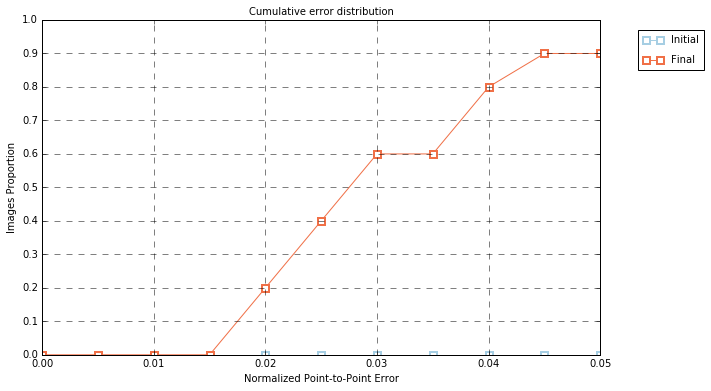

In [25]:
plot_ced([initial_errors, final_errors], legend_entries=['Initial', 'Final'])